# E-commerce Customer Segmentation using K-Means

In this project, we perform customer segmentation using the K-Means clustering algorithm.

**Objectives:**
- Cluster customers based on purchasing behavior.
- Identify distinct customer segments (personas).
- Provide insights for targeted marketing and personalization.

**Tools & Tech:** Python, Pandas, NumPy, scikit-learn, Seaborn, Matplotlib
**Dataset:** Mall Customer Segmentation Data (Kaggle)


In [11]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Plot style (optional)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)


In [12]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.shape


(200, 5)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.isna().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Exploratory Data Analysis (EDA)

We explore the distribution of key variables like Age, Annual Income, and Spending Score,
and look for basic patterns in customer behavior.


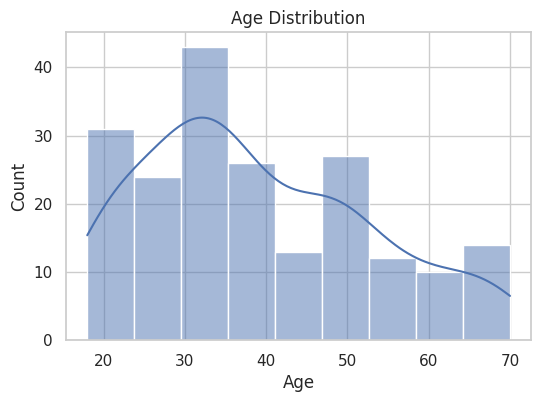

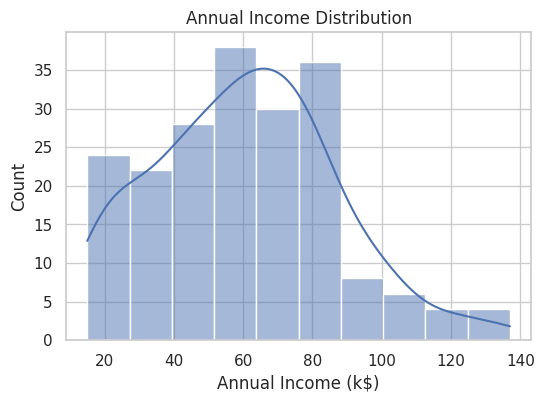

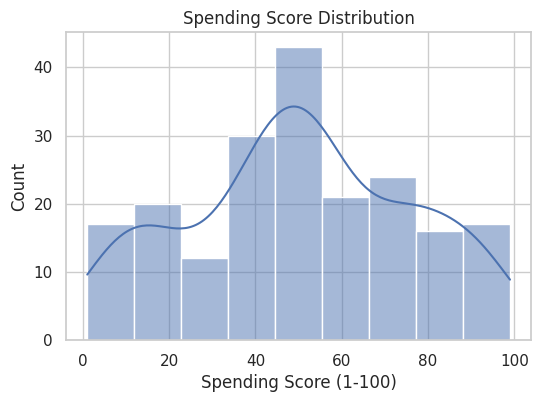

In [17]:
# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Distribution of Annual Income
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

# Distribution of Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()


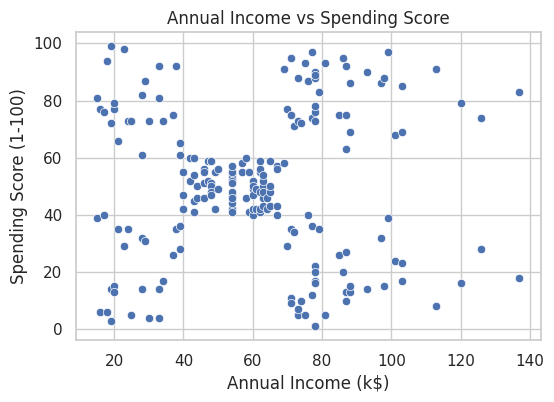

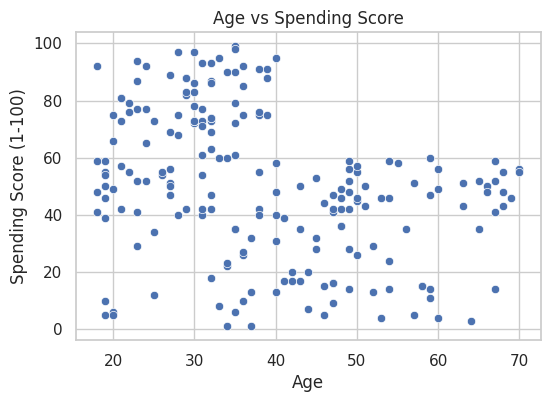

In [18]:
# Income vs Spending Score
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)'
)
plt.title("Annual Income vs Spending Score")
plt.show()

# Age vs Spending Score
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)'
)
plt.title("Age vs Spending Score")
plt.show()


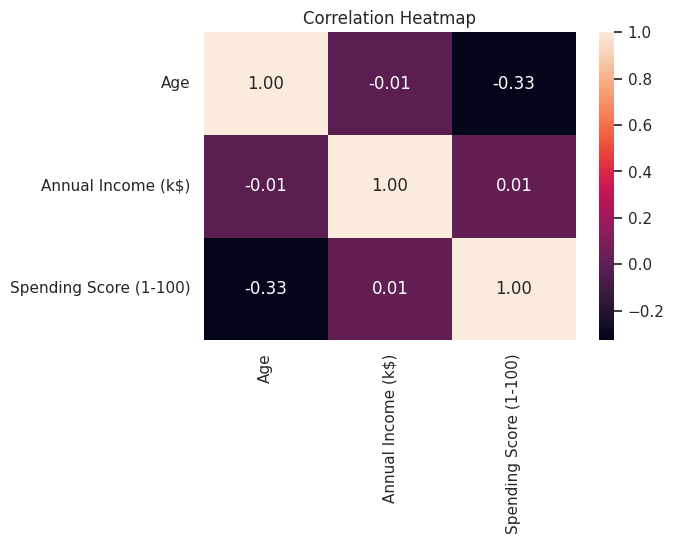

In [19]:
corr_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Feature Selection & Scaling

We will start with two key features:
- Annual Income
- Spending Score

These are commonly used to build simple but meaningful customer segments.

We then scale the features because K-Means is distance-based and sensitive to feature scale.


In [20]:
# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## Choosing the Optimal Number of Clusters

We use:
- **Elbow Method**: Looks at the Within-Cluster Sum of Squares (WCSS) vs k.
- (Optional) **Silhouette Score**: Measures how well each point fits within its cluster.


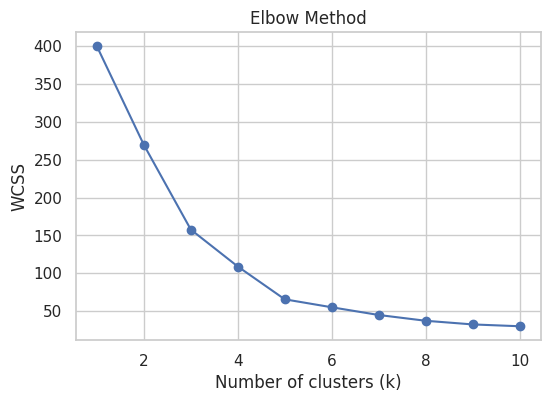

In [21]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Silhouette Score

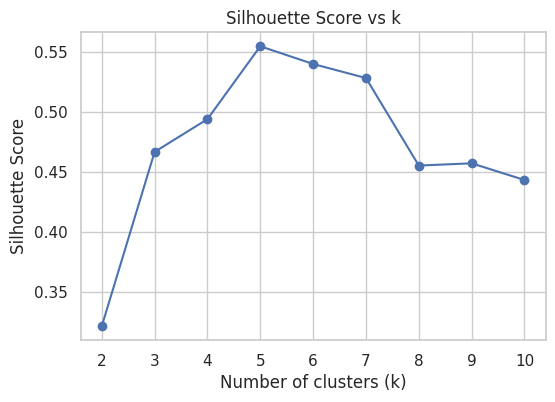

k = 2, silhouette score = 0.321
k = 3, silhouette score = 0.467
k = 4, silhouette score = 0.494
k = 5, silhouette score = 0.555
k = 6, silhouette score = 0.540
k = 7, silhouette score = 0.528
k = 8, silhouette score = 0.455
k = 9, silhouette score = 0.457
k = 10, silhouette score = 0.443


In [22]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

for k, score in zip(range(2, 11), silhouette_scores):
    print(f"k = {k}, silhouette score = {score:.3f}")


In [23]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()
df['Cluster'].value_counts()


,count
Cluster,
0,81
1,39
3,35
4,23
2,22


## Cluster Visualization

We visualize customers on the 2D plane of:
- Annual Income vs Spending Score
and color them by cluster to understand the segments.


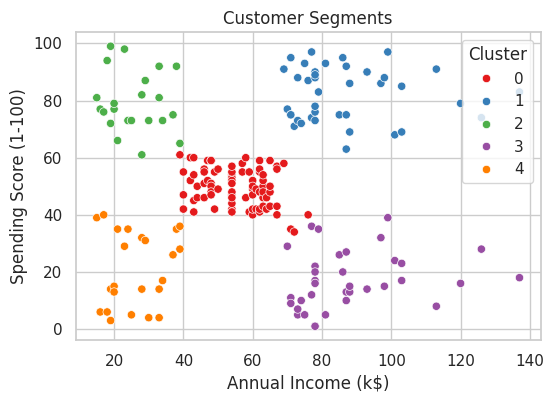

In [24]:
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1'
)
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()


In [25]:
cluster_profile = df.groupby('Cluster')[['Age',
                                         'Annual Income (k$)',
                                         'Spending Score (1-100)']].mean().round(1)
cluster_profile


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.7,55.3,49.5
1,32.7,86.5,82.1
2,25.3,25.7,79.4
3,41.1,88.2,17.1
4,45.2,26.3,20.9


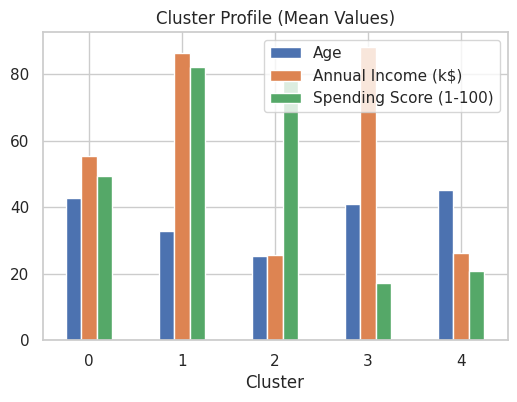

In [26]:
cluster_profile.plot(kind='bar')
plt.title('Cluster Profile (Mean Values)')
plt.xticks(rotation=0)
plt.show()


## Customer Personas (Cluster Interpretation)

Based on the cluster profiles:

- **Cluster 0 – High Income, High Spending**
  - Above-average income and very high spending score.
  - Likely premium, loyal customers.
  - **Strategy:** Exclusive offers, loyalty programs, early access to sales.

- **Cluster 1 – Low Income, High Spending**
  - Lower income but relatively high spending.
  - **Strategy:** Discounts, EMI options, bundle offers.

- **Cluster 2 – High Income, Low Spending**
  - High income but low spending score.
  - **Strategy:** Upselling, personalized recommendations, targeted campaigns.

- **Cluster 3 – Average Income, Average Spending**
  - Mid-range customers.
  - **Strategy:** Standard marketing, seasonal offers.

- **Cluster 4 – Low Income, Low Spending**
  - Lowest income and spending.
  - **Strategy:** Budget products, heavy discounts, awareness campaigns.


## Conclusion

- Applied **K-Means clustering** on mall customer data using annual income and spending score.
- Used **Elbow Method** and **Silhouette Score** to determine an appropriate number of clusters (k = 5).
- Identified distinct customer segments (e.g., premium high-value customers, potential customers, budget-conscious customers).
- Visualized clusters and summarized their profiles to support **targeted marketing decisions**.

**Future Work:**
- Add more features (e.g. Age, Gender, RFM metrics from transaction data).
- Try other clustering algorithms (GMM, Hierarchical clustering, DBSCAN).
- Deploy as an interactive dashboard using Streamlit or a simple web app.
